In [12]:
import os
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JeonHyeonchang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [13]:
def load_txt(path):
    with open(path, 'r') as f:
        data = f.readlines()
    return data

def load_txt_data(path):
    result = []
    for filename in os.listdir(path):
        text = load_txt(os.path.join(path, filename))[0]
        result.append(text)
    return result

In [14]:
positive = load_txt_data("./data/train/positive")
negative = load_txt_data("./data/train/negative")
total = positive + negative

### the total number of unique words

In [15]:
total_words = []
for doc in total:
    total_words += doc.split()
unique_words = set(total_words)
print(len(unique_words))

24473


### the total number of training examples

In [16]:
print(len(total))

2000


### the ratio of positive examples to negative examples

In [17]:
print(len(positive), len(negative))

1000 1000


### the average length of document

In [18]:
lengths = [len(doc) for doc in total]
print(sum(lengths)/len(lengths))

963.3975


### the max length of document

In [19]:
print(max(lengths))

20775


### Determining sentence length

In [20]:
sentences = []
for doc in total:
    sentences += nltk.tokenize.sent_tokenize(doc)

In [21]:
sentence_lens = [len(s.split()) for s in sentences]
sentence_lens.sort()

In [22]:
ratio = 0.95
length = sentence_lens[int(len(sentence_lens)*ratio)]

In [23]:
print(length)

45


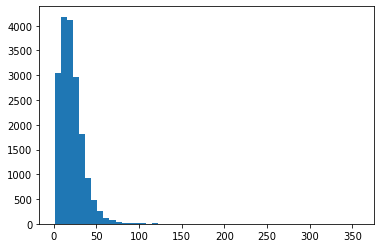

In [24]:
plt.hist(sentence_lens, bins=50)
plt.show()